In [1]:
import pickle
import numpy as np
from collections import defaultdict

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


In [3]:
approach_path = "/home/bschroed/Documents/projects/restraintmaker/devtools/otherScripts/a_benchmark_algorithms"
input_path=approach_path+"/out/out_state.obj"
f = open(input_path, "rb")
d_dict = pickle.load(f)
d_dict


{'it0': {'punktwolke_6': {'greedy_shortest': {'volume': 1.0920359197467178,
    'distance': 13.49844,
    't': 0.001695},
   'brute_force_ch': {'volume': 1.0920359197467178,
    'distance': 13.49844,
    't': 0.612115},
   'brute_force_dist': {'volume': 1.0920359197467178,
    'distance': 13.49844,
    't': 0.866786},
   'random': {'t': 0,
    'volume': 0.1416198296231487,
    'distance': 8.339864599999999,
    'volume_std': 0.15694957858344347,
    'distance_std': 1.6663021073973472}},
  'punktwolke_7': {'greedy_shortest': {'volume': 0.8006763559274952,
    'distance': 13.08961,
    't': 0.004234},
   'brute_force_ch': {'volume': 1.0920359197467178,
    'distance': 13.49844,
    't': 2.66137},
   'brute_force_dist': {'volume': 1.0920359197467178,
    'distance': 13.49844,
    't': 3.8392020000000002},
   'random': {'t': 0,
    'volume': 0.13526366825018088,
    'distance': 8.322907800000001,
    'volume_std': 0.15090725738593516,
    'distance_std': 1.5890829498856125}},
  'punktwolke

In [4]:
#Data Preperation
particles = []
partic_key = None


timing = {}
volume ={}
distance = {}
for it in d_dict:
    clouds =  d_dict[it]
    ttiming = defaultdict(list)
    tvolume = defaultdict(list)
    tdistance = defaultdict(list)

    if len(particles) == 0:
        partic_key = list(sorted(clouds, key=lambda x: int(x.split("_")[-1])))
        particles = [int(x.split("_")[-1]) for x in partic_key]

    for cloud in partic_key:
        methods = clouds[cloud]
        method_keys = methods.keys()
        for method in methods:
            ttiming[method].append(methods[method]['t'])
            tvolume[method].append(methods[method]['volume'])
            tdistance[method].append(methods[method]['distance'])

    for method in method_keys:
        if(method in timing):
            timing[method]["iterations"].update({it: np.array(ttiming[method])})
            volume[method]["iterations"].update({it: np.array(tvolume[method])})
            distance[method]["iterations"].update({it: np.array(tdistance[method])})
        else:
            timing.update({method: {'iterations':{it: np.array(ttiming[method])}}})
            volume.update({method: {'iterations':{it: np.array(tvolume[method])}}})
            distance.update({method: {'iterations':{it: np.array(tdistance[method])}}})


##Final Stat:
keys = list(timing.keys())
for method in keys:
    method_data = timing[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    timing[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})

    #Volume
    method_data = volume[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    volume[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})

    #Distance
    method_data = distance[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    distance[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})
pass

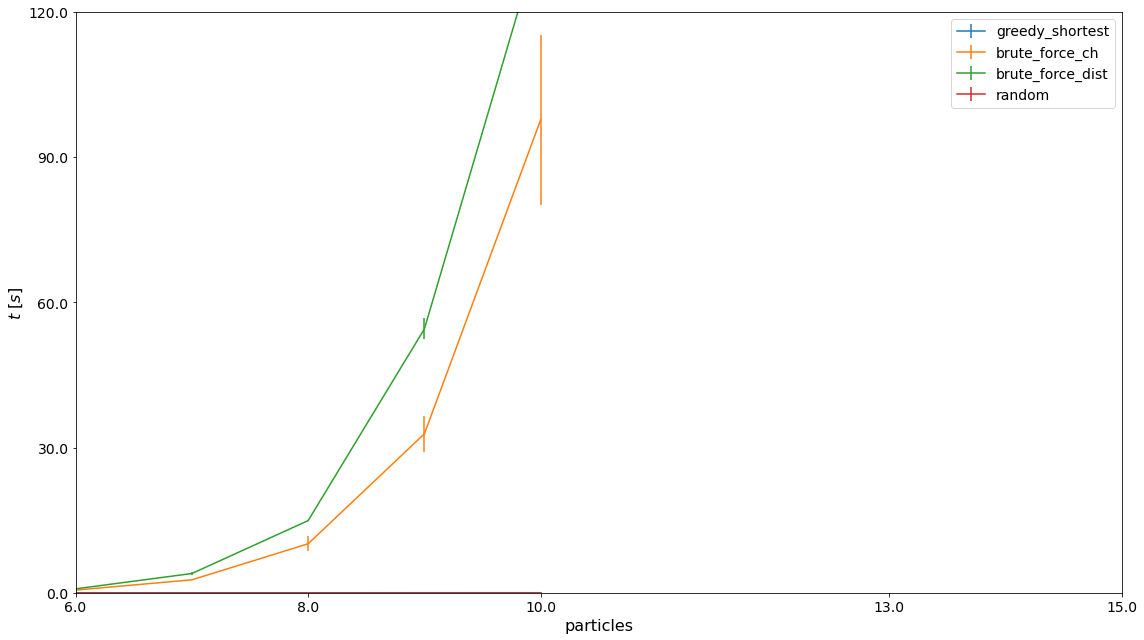

In [5]:
### Timing

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

for method in timing:
    ax.errorbar(x=particles, y=timing[method]["avg"], yerr=timing[method]["std"], label=method)

ax.set_ylabel("$t~[s]$", fontsize=16)
ax.set_xlabel("particles", fontsize=16)

y=np.round(np.linspace(0, 120, 5))
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=14)

x=np.round(np.linspace(6, 15, 5))
ax.set_xlim(min(x), max(x))
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=14)

ax.legend(fontsize=14)

fig.tight_layout()


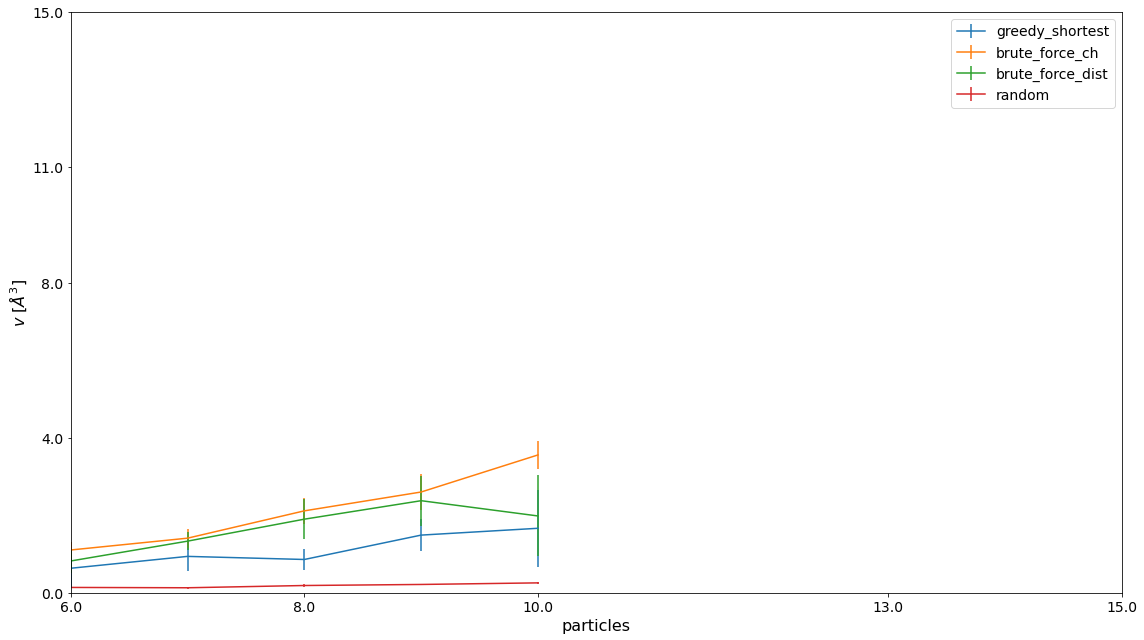

In [6]:
### Convex Hull

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

for method in timing:
    ax.errorbar(x=particles, y=volume[method]["avg"], yerr=volume[method]["std"], label=method)

ax.set_ylabel("$v~[\AA^3]$", fontsize=16)
ax.set_xlabel("particles", fontsize=16)

y=np.round(np.linspace(0, 15, 5))
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=14)

x=np.round(np.linspace(6, 15, 5))
ax.set_xlim(min(x), max(x))
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=14)

ax.legend(fontsize=14)

fig.tight_layout()


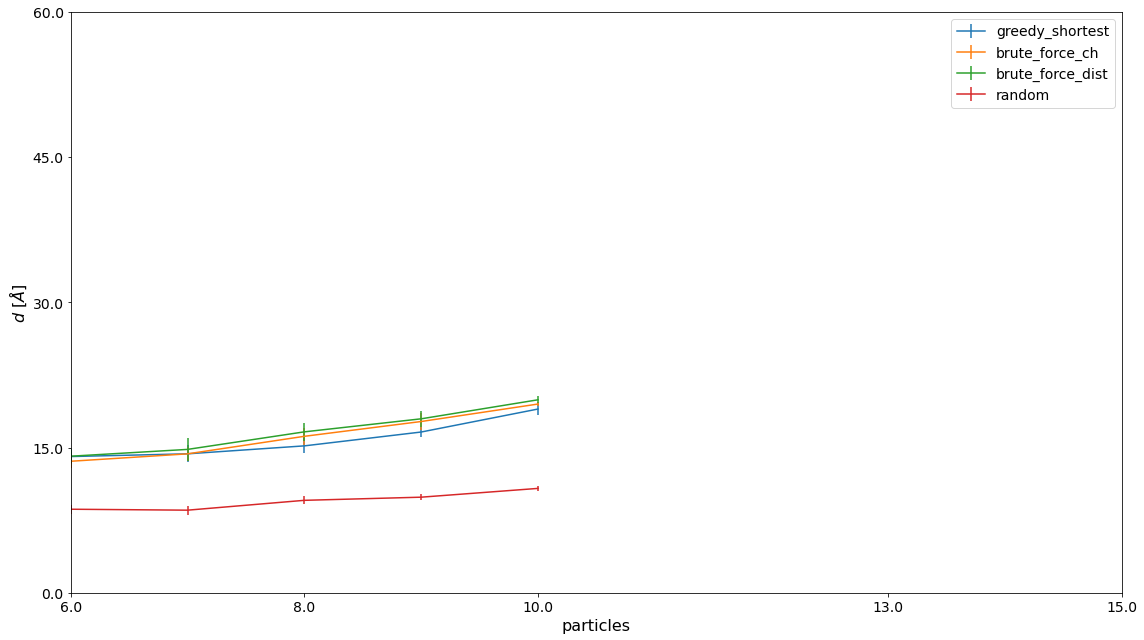

In [7]:
### Distance

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

for method in timing:
    ax.errorbar(x=particles, y=distance[method]["avg"], yerr=distance[method]["std"], label=method)

ax.set_ylabel("$d~[\AA]$", fontsize=16)
ax.set_xlabel("particles", fontsize=16)

y=np.round(np.linspace(0, 60, 5))
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=14)

x=np.round(np.linspace(6, 15, 5))
ax.set_xlim(min(x), max(x))
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=14)

ax.legend(fontsize=14)

fig.tight_layout()